## Exploration

Importer le data set sur le sexisme

In [1]:
import pandas as pd

data = pd.read_csv("/Users/camillepettineo/code/sunc33/sexist_speech_recognition/sexist_speech_recognition/data/sexism_data_sexism_data.csv")

On commence par regarder la répartition des catégories de la colonne 'dataset'. On décide de retirer les messages correspondant à 'scales'

In [2]:
data.shape

(13631, 6)

In [3]:
data['dataset'].unique()

array(['other', 'callme', 'benevolent', 'scales', 'hostile'], dtype=object)

In [4]:
data['sexist'].value_counts()

False    11822
True      1809
Name: sexist, dtype: int64

In [5]:
data[data.dataset == 'scales']

,id,dataset,text,toxicity,sexist,of_id
14,14,scales,Women have more intuition than men.,0.321429,True,-1
18,18,scales,No one should be set on a pedestal by their si...,0.081340,False,708
30,30,scales,Women do not belong in politics,0.451443,True,-1
45,45,scales,"On the average, men are more arrogant than women",0.530905,True,-1
55,55,scales,A woman will never be truly fulfilled in life ...,0.206631,True,-1
...,...,...,...,...,...,...
13585,13589,scales,Many people have a quality of purity that few ...,0.260322,False,2484
13604,13608,scales,A man shouldn’t have to worry about birth-control,0.073215,True,-1
13605,13609,scales,Men cannot relate to other persons as well as ...,0.141320,True,-1
13613,13617,scales,"As head of the household, the father should ha...",0.095359,True,-1


In [6]:
data['longueur_texte'] = data['text'].apply(len)

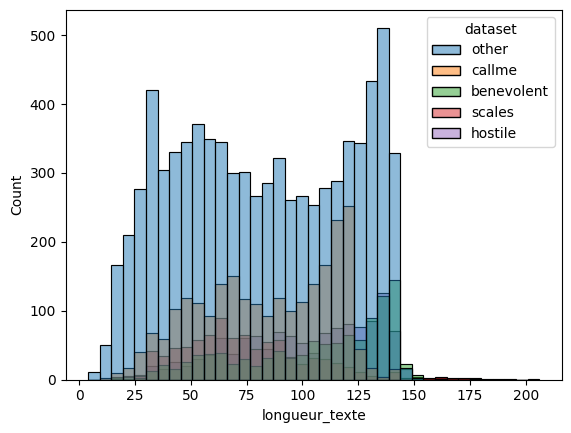

In [7]:
import seaborn as sns

sns.histplot(data=data, x='longueur_texte', hue = 'dataset');

In [8]:
data = data[data['longueur_texte'] < 150]

In [9]:
data

,id,dataset,text,toxicity,sexist,of_id,longueur_texte
0,0,other,MENTION3481 i didn't even know random was an o...,0.118180,False,-1,52
1,1,other,Bottom two should've gone! #mkr,0.251850,False,-1,32
2,2,callme,MENTION3111 MENTION3424 ladyboner deserves so ...,0.113331,False,-1,103
3,3,other,She shall now be known as Sourpuss #MKR #KatAn...,0.531153,False,-1,64
4,4,other,Tarah W threw a bunch of women under the bus s...,0.118718,False,-1,106
...,...,...,...,...,...,...,...
13626,13630,callme,this reminds me of the MENTION3079 situation; ...,0.147044,False,-1,110
13627,13631,other,#mkr I love Annie and loyld there like a real ...,0.213106,False,-1,81
13628,13632,other,No u. http://t.co/zOr0eWahSS,0.324702,False,-1,28
13629,13633,other,#mkr the way kat looks at Annie is like she's ...,0.563036,False,-1,85


Comme on ne doit travailler que sur des messages ressemblant à des tweets on va retirer la colonne 'scales'

In [10]:
data = data.drop(data[data.dataset == 'scales'].index)

In [11]:
data.head()

,id,dataset,text,toxicity,sexist,of_id,longueur_texte
0,0,other,MENTION3481 i didn't even know random was an o...,0.118180,False,-1,52
1,1,other,Bottom two should've gone! #mkr,0.251850,False,-1,32
2,2,callme,MENTION3111 MENTION3424 ladyboner deserves so ...,0.113331,False,-1,103
3,3,other,She shall now be known as Sourpuss #MKR #KatAn...,0.531153,False,-1,64
4,4,other,Tarah W threw a bunch of women under the bus s...,0.118718,False,-1,106


In [12]:
data.shape

(12733, 7)

Ce data set contient 13 631 datas

In [13]:
data.describe()

,id,toxicity,of_id,longueur_texte
count,12733.000000,12733.000000,12733.000000,12733.000000
mean,6832.774994,0.329546,1145.982879,85.810100
std,3933.452181,0.250109,3019.395224,36.326054
min,0.000000,0.010310,-1.000000,4.000000
25%,3432.000000,0.126626,-1.000000,55.000000
50%,6834.000000,0.243885,-1.000000,88.000000
75%,10248.000000,0.457413,-1.000000,118.000000
max,13634.000000,0.991935,13627.000000,149.000000


In [14]:
print(f'Message non sexist :', round(data.sexist.value_counts()[0]/data.sexist.count()*100), '%')
print(f'Message sexist :', round(data.sexist.value_counts()[1]/data.sexist.count()*100), '%')

Message non sexist : 90 %
Message sexist : 10 %


In [15]:
data.dtypes

id                  int64
dataset            object
text               object
toxicity          float64
sexist               bool
of_id               int64
longueur_texte      int64
dtype: object

Le data set ne contient aucun duplicates

In [16]:
data.duplicated().sum()

0

Répartition de la Toxicité des messages

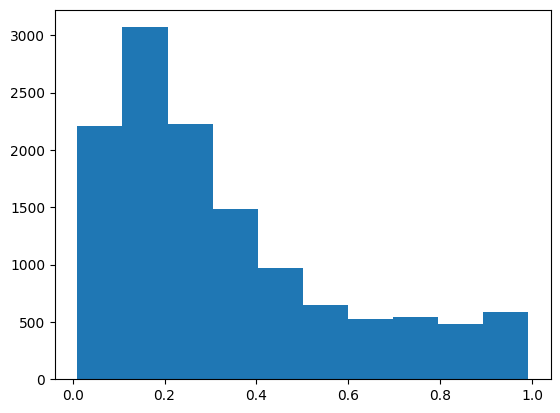

In [17]:
import matplotlib.pyplot as plt
plt.hist(data.toxicity);

## création d'un dataframe en vu du merge

In [18]:
sexist_df = data[['text','sexist', 'longueur_texte']]
sexist_df

,text,sexist,longueur_texte
0,MENTION3481 i didn't even know random was an o...,False,52
1,Bottom two should've gone! #mkr,False,32
2,MENTION3111 MENTION3424 ladyboner deserves so ...,False,103
3,She shall now be known as Sourpuss #MKR #KatAn...,False,64
4,Tarah W threw a bunch of women under the bus s...,False,106
...,...,...,...
13626,this reminds me of the MENTION3079 situation; ...,False,110
13627,#mkr I love Annie and loyld there like a real ...,False,81
13628,No u. http://t.co/zOr0eWahSS,False,28
13629,#mkr the way kat looks at Annie is like she's ...,False,85


In [19]:
sexist_df

,text,sexist,longueur_texte
0,MENTION3481 i didn't even know random was an o...,False,52
1,Bottom two should've gone! #mkr,False,32
2,MENTION3111 MENTION3424 ladyboner deserves so ...,False,103
3,She shall now be known as Sourpuss #MKR #KatAn...,False,64
4,Tarah W threw a bunch of women under the bus s...,False,106
...,...,...,...
13626,this reminds me of the MENTION3079 situation; ...,False,110
13627,#mkr I love Annie and loyld there like a real ...,False,81
13628,No u. http://t.co/zOr0eWahSS,False,28
13629,#mkr the way kat looks at Annie is like she's ...,False,85


In [20]:
sexist_df = sexist_df.rename(columns = {'sexist':'label'})
sexist_df

,text,label,longueur_texte
0,MENTION3481 i didn't even know random was an o...,False,52
1,Bottom two should've gone! #mkr,False,32
2,MENTION3111 MENTION3424 ladyboner deserves so ...,False,103
3,She shall now be known as Sourpuss #MKR #KatAn...,False,64
4,Tarah W threw a bunch of women under the bus s...,False,106
...,...,...,...
13626,this reminds me of the MENTION3079 situation; ...,False,110
13627,#mkr I love Annie and loyld there like a real ...,False,81
13628,No u. http://t.co/zOr0eWahSS,False,28
13629,#mkr the way kat looks at Annie is like she's ...,False,85


In [21]:
# create a CSV
path = '/Users/camillepettineo/code/sunc33/sexist_speech_recognition/sexist_speech_recognition/data/sexist_df.csv'

def df_to_csv(df, path):
    df.to_csv(path)


In [22]:
df_to_csv(sexist_df,path)

## Merger les Data_Set

In [23]:
sexism_liam_df = pd.read_csv("/Users/camillepettineo/code/sunc33/sexist_speech_recognition/sexist_speech_recognition/data/sexism_liam.csv")

In [24]:
sexism_liam_df = sexism_liam_df.drop(columns = 'Unnamed: 0')
sexism_liam_df

,text,label,longeur_text
0,It is fitting that we are now seeing these str...,none,139
1,Oh gosh she mentioned me and #ggautoblocker in...,none,104
2,"In this ongoing tragedy, we found our voices &...",none,148
3,I can't even find the words to describe how mu...,none,139
4,We talk about GamerGate a lot. But the truth i...,none,117
...,...,...,...
10178,I like how GG took TB's statement at http://t....,none,115
10179,"According to ralphreject, GDC is just a place ...",none,139
10180,nichegamer got blacklisted by a gaming company...,none,130
10181,countdown to more companies following suit aft...,none,81


In [25]:
sexism_liam_df = sexism_liam_df.rename(columns = {'longeur_text':'longueur_texte'})
sexism_liam_df

,text,label,longueur_texte
0,It is fitting that we are now seeing these str...,none,139
1,Oh gosh she mentioned me and #ggautoblocker in...,none,104
2,"In this ongoing tragedy, we found our voices &...",none,148
3,I can't even find the words to describe how mu...,none,139
4,We talk about GamerGate a lot. But the truth i...,none,117
...,...,...,...
10178,I like how GG took TB's statement at http://t....,none,115
10179,"According to ralphreject, GDC is just a place ...",none,139
10180,nichegamer got blacklisted by a gaming company...,none,130
10181,countdown to more companies following suit aft...,none,81


In [26]:
sexist_df.label	.value_counts()

False    11465
True      1268
Name: label, dtype: int64

In [27]:
sexist_df

,text,label,longueur_texte
0,MENTION3481 i didn't even know random was an o...,False,52
1,Bottom two should've gone! #mkr,False,32
2,MENTION3111 MENTION3424 ladyboner deserves so ...,False,103
3,She shall now be known as Sourpuss #MKR #KatAn...,False,64
4,Tarah W threw a bunch of women under the bus s...,False,106
...,...,...,...
13626,this reminds me of the MENTION3079 situation; ...,False,110
13627,#mkr I love Annie and loyld there like a real ...,False,81
13628,No u. http://t.co/zOr0eWahSS,False,28
13629,#mkr the way kat looks at Annie is like she's ...,False,85


In [28]:
sm_df = sexism_liam_df.append(sexist_df)

/var/folders/bx/7srdzvwx4v1_rpc2gyh8tn3h0000gn/T/ipykernel_2973/1203093076.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sm_df = sexism_liam_df.append(sexist_df)


In [29]:
sm_df

,text,label,longueur_texte
0,It is fitting that we are now seeing these str...,none,139
1,Oh gosh she mentioned me and #ggautoblocker in...,none,104
2,"In this ongoing tragedy, we found our voices &...",none,148
3,I can't even find the words to describe how mu...,none,139
4,We talk about GamerGate a lot. But the truth i...,none,117
...,...,...,...
13626,this reminds me of the MENTION3079 situation; ...,False,110
13627,#mkr I love Annie and loyld there like a real ...,False,81
13628,No u. http://t.co/zOr0eWahSS,False,28
13629,#mkr the way kat looks at Annie is like she's ...,False,85


## Déterminer le X et le y :

In [30]:
sm_df['label'].value_counts()

False     11465
none       7499
sexism     2672
True       1268
racism       12
Name: label, dtype: int64

On drop les racistes

In [31]:
sm_df = sm_df[sm_df['label']!= 'racism']

In [32]:
sm_df['label'].value_counts()

False     11465
none       7499
sexism     2672
True       1268
Name: label, dtype: int64

In [33]:
sm_df['label'] = sm_df['label'].map({False : 0, 'none': 0, 'sexism': 1, True : 1})
sm_df

/var/folders/bx/7srdzvwx4v1_rpc2gyh8tn3h0000gn/T/ipykernel_2973/3013560896.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sm_df['label'] = sm_df['label'].map({False : 0, 'none': 0, 'sexism': 1, True : 1})


,text,label,longueur_texte
0,It is fitting that we are now seeing these str...,0,139
1,Oh gosh she mentioned me and #ggautoblocker in...,0,104
2,"In this ongoing tragedy, we found our voices &...",0,148
3,I can't even find the words to describe how mu...,0,139
4,We talk about GamerGate a lot. But the truth i...,0,117
...,...,...,...
13626,this reminds me of the MENTION3079 situation; ...,0,110
13627,#mkr I love Annie and loyld there like a real ...,0,81
13628,No u. http://t.co/zOr0eWahSS,0,28
13629,#mkr the way kat looks at Annie is like she's ...,0,85


In [34]:
sm_df['label'].value_counts()

0    18964
1     3940
Name: label, dtype: int64

In [49]:
# X = sm_df.drop(columns = 'label').drop(columns = 'longueur_texte')
# X

Pour créer le y nous allons utiliser un OneEncoder if binary pour transformer les False et True en 0 et 1.

In [36]:
# from sklearn.preprocessing import OneHotEncoder

# ohe = OneHotEncoder(drop='if_binary', sparse = False) # Instantiate encoder for binary feature

# ohe.fit(X[['sexist']]) # Fit encoder

# X['sexist'] = ohe.transform(X[['sexist']]) # Encode Street

In [50]:
# X.head()

In [51]:
# y = sm_df['label']
# y

## SEPARATION DES DATA (60% normal - 40% sexiste)

In [52]:
sm_df_clean = sm_df.drop(columns = 'longueur_texte')
sm_df_clean

,text,label
0,It is fitting that we are now seeing these str...,0
1,Oh gosh she mentioned me and #ggautoblocker in...,0
2,"In this ongoing tragedy, we found our voices &...",0
3,I can't even find the words to describe how mu...,0
4,We talk about GamerGate a lot. But the truth i...,0
...,...,...
13626,this reminds me of the MENTION3079 situation; ...,0
13627,#mkr I love Annie and loyld there like a real ...,0
13628,No u. http://t.co/zOr0eWahSS,0
13629,#mkr the way kat looks at Annie is like she's ...,0


In [114]:
sm_df_clean = sm_df_clean.sample(frac=1, random_state = 1).reset_index()
sm_df_clean

,level_0,index,text,label
0,18847,5865,The message is clear: This target *WILL* be le...,0
1,1427,12587,Dev week matches my outfit! http://t.co/s8i4HD...,0
2,22606,1580,"#mkr Katie &amp; Nikki are atrocities, but Kat...",1
3,22039,5232,kids just cannot talk football. My 4 year old ...,0
4,6398,459,"Soz my kitchen rules I've lost interest, the i...",0
...,...,...,...,...
22899,10955,278,1⃣7⃣ from contestants jeezzz it wasn't that ba...,0
22900,17289,13186,"MENTION491 MENTION2930 Uh, no.",0
22901,5192,4429,"RT @paddymcbride90: I'm not sexist, but if I w...",1
22902,12172,12554,MENTION1594 MENTION3711 i dunno. I think PC is...,0


In [40]:
sm_df_clean['label'].value_counts()

0    18964
1     3940
Name: label, dtype: int64

In [41]:
#on veut 3141 sexiste

train_sexist = sm_df_clean[sm_df_clean['label'] == 1].head(3152)
train_sexist

,text,label
197,@comattwow @ChubsSays It allows me to simultan...,1
198,@comattwow @ChubsSays ...it's not a negative o...,1
199,"@comattwow @ChubsSays No, I said that about fe...",1
200,"@comattwow @ChubsSays Again, talking about fem...",1
201,@thespypoet Prison is the same...except with m...,1
...,...,...
5167,#QuestionsForMen Did you know feminists think ...,1
5171,"A woman should know how to look like a girl, h...",1
5188,I'm not vegetarian to an extent but eat anythi...,1
5202,RT MENTION3142 I have yet to have a women roll...,1


In [42]:
train_pas_sexist = sm_df_clean[sm_df_clean['label'] == 0].head(4728)
train_OK = train_pas_sexist.append(train_sexist)

/var/folders/bx/7srdzvwx4v1_rpc2gyh8tn3h0000gn/T/ipykernel_2973/1146595674.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_OK = train_pas_sexist.append(train_sexist)


In [43]:
#C'est le df train 60% / 40%
train_OK

,text,label
0,It is fitting that we are now seeing these str...,0
1,Oh gosh she mentioned me and #ggautoblocker in...,0
2,"In this ongoing tragedy, we found our voices &...",0
3,I can't even find the words to describe how mu...,0
4,We talk about GamerGate a lot. But the truth i...,0
...,...,...
5167,#QuestionsForMen Did you know feminists think ...,1
5171,"A woman should know how to look like a girl, h...",1
5188,I'm not vegetarian to an extent but eat anythi...,1
5202,RT MENTION3142 I have yet to have a women roll...,1


In [44]:
X_train_ok = train_OK['text']
y_train_ok = train_OK['label']

In [45]:
test_sexist = sm_df_clean[sm_df_clean['label'] == 1].tail(788)


,text,label
5220,"Can't believe ""educated"" #Liberal women buy in...",1
5228,"You may the only Vines look at, are the ones f...",1
5229,It makes me cringe so bad when girls genuinely...,1
5240,Just watched 10 mins of the women's rugby Worl...,1
5260,Slimer will have boobs & an eating disorder. M...,1
...,...,...
13584,woman comedians are NOT funny in the slightest.,1
13589,"MENTION3859 MENTION61 MENTION2729 I'm sorry, I...",1
13593,I absolutely hate a female who talks sports or...,1
13607,"RT MENTION4556 call me sexist, but i hate to h...",1


In [46]:
test_pas_sexist = sm_df_clean[sm_df_clean['label'] == 0].tail(5000)
test_pas_sexist

,text,label
7710,HAHAHAHAHA suckers!!!!! #mkr,0
7711,"I am a woman in tech, and I do not want MENTIO...",0
7713,I have no words. Bs meter overload. #mkr,0
7714,I just saw a rookie masterfully parallel park ...,0
7715,I love some woman on woman trophy lovin #usa h...,0
...,...,...
13626,this reminds me of the MENTION3079 situation; ...,0
13627,#mkr I love Annie and loyld there like a real ...,0
13628,No u. http://t.co/zOr0eWahSS,0
13629,#mkr the way kat looks at Annie is like she's ...,0


In [53]:
test_OK = test_pas_sexist.append(test_sexist)

/var/folders/bx/7srdzvwx4v1_rpc2gyh8tn3h0000gn/T/ipykernel_2973/2709531240.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_OK = test_pas_sexist.append(test_sexist)


In [54]:
X_test_ok = test_OK['text']
y_test_ok = test_OK['label']

In [55]:
# sm_df_clean[sm_df_clean['label'] == 1]

In [60]:
X_train_ok 

0       It is fitting that we are now seeing these str...
1       Oh gosh she mentioned me and #ggautoblocker in...
2       In this ongoing tragedy, we found our voices &...
3       I can't even find the words to describe how mu...
4       We talk about GamerGate a lot. But the truth i...
                              ...                        
5167    #QuestionsForMen Did you know feminists think ...
5171    A woman should know how to look like a girl, h...
5188    I'm not vegetarian to an extent but eat anythi...
5202    RT MENTION3142 I have yet to have a women roll...
5206                  female commentators ruin every game
Name: text, Length: 7880, dtype: object

## Preprocessing

To-Do-liste :
    
    -> lowercase
    -> dealing with numbers, punctuation and symbols
    -> splitting
    -> tokenizing
    -> removing "stopwords"
    -> lemmatizing

aller voir : https://kitt.lewagon.com/camps/941/lectures/content/05-ML_10-Natural-Language-Processing.html

On crée une fonction cleanning qui strip, lower, enlève les digits, enlève la ponctuation, définit puis retire les stopword (mots qui se répètent), et lematize (groupe les mots par famille).

In [61]:
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import re

def cleaning(sentence):
    
    # Basic cleaning
    sentence = re.sub(r'http[^ ]+', '', sentence, flags=re.MULTILINE)
    sentence = sentence.strip() ## remove whitespaces
    sentence = sentence.lower() ## lowercase 
    sentence = ''.join(char for char in sentence if not char.isdigit()) ## remove numbers
    
    # Advanced cleaning
    for punctuation in string.punctuation:
        sentence = sentence.replace(punctuation, '') ## remove punctuation
    
    tokenized_sentence = word_tokenize(sentence) ## tokenize 
    stop_words = set(stopwords.words('english')) ## define stopwords
    
    tokenized_sentence_cleaned = [ ## remove stopwords
        w for w in tokenized_sentence if not w in stop_words
    ]

    lemmatized = [
        WordNetLemmatizer().lemmatize(word, pos = "v") 
        for word in tokenized_sentence_cleaned
    ]
    
    cleaned_sentence = ' '.join(word for word in lemmatized)
    
    return cleaned_sentence

In [63]:
X_train_ok = X_train_ok.apply(cleaning)

In [64]:
X_train_ok 

0       fit see strong women speak try fix problems ot...
1       oh gosh mention ggautoblocker talk blush try s...
2       ongoing tragedy find voice amp learn work toge...
3       cant even find word describe much value work p...
4       talk gamergate lot truth gamergate isnt real b...
                              ...                        
5167    questionsformen know feminists think violence ...
5171    woman know look like girl act like lady think ...
5188    im vegetarian extent eat anything beef mention...
5202    rt mention yet women roll good burrito chipotl...
5206                  female commentators ruin every game
Name: text, Length: 7880, dtype: object

In [65]:
X_test_ok = X_test_ok.apply(cleaning)

In [66]:
X_test_ok

7710                                hahahahaha suckers mkr
7711     woman tech want mention speak block wont creep...
7713                            word bs meter overload mkr
7714          saw rookie masterfully parallel park ’ first
7715                     love woman woman trophy lovin usa
                               ...                        
13584                      woman comedians funny slightest
13589    mention mention mention im sorry dont like fem...
13593         absolutely hate female talk sport commentate
13607    rt mention call sexist hate hear girls argue b...
13623                               eat like man old news😂
Name: text, Length: 5788, dtype: object

In [ ]:
#path_2 = '/Users/camillepettineo/code/sunc33/sexist_speech_recognition/sexist_speech_recognition/data/test.csv'
#df_to_csv(X,path_2)

## Baseline

Création d'un modèle de base simple qui servira de référence dans un projet d'apprentissage automatique. Sa fonction principale est de contextualiser les résultats des modèles entraînés. Piste de modèles pour la baseline :  
  
• Naive Bayes  
• SVM  

Rappel :
 
- Importez le modèle : *from sklearn import model*
- Instanciez le modèle : *model = model()*
- Entraînez le modèle : *model.fit(X, y)*
- Évaluez le modèle : *model.score(new_X, new_y)*
- Faire des prédictions: *model.predict(new_X)*

Nous appliquons un N-grams pour garder le contexte dans l'utilisation d'un bag-of-words. An efficient way to capture context is to consider:

the count of single tokens (unigrams)
the count of pairs (bigrams), triplets (trigrams), and more generally sequences of  
n
  words, also known as n-grams

In [67]:
X_train_ok

0       fit see strong women speak try fix problems ot...
1       oh gosh mention ggautoblocker talk blush try s...
2       ongoing tragedy find voice amp learn work toge...
3       cant even find word describe much value work p...
4       talk gamergate lot truth gamergate isnt real b...
                              ...                        
5167    questionsformen know feminists think violence ...
5171    woman know look like girl act like lady think ...
5188    im vegetarian extent eat anything beef mention...
5202    rt mention yet women roll good burrito chipotl...
5206                  female commentators ruin every game
Name: text, Length: 7880, dtype: object

### Baseline avec un Naive_Bayes

In [91]:
import numpy as np

from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import recall_score


# Pipeline vectorizer + Naive Bayes
pipeline_naive_bayes = make_pipeline(TfidfVectorizer(), 
                                     MultinomialNB())


In [110]:
# Cross-validation
# cv_results = cross_validate(pipeline_naive_bayes, X_train_ok, y_train_ok, cv = 5, scoring = ["precision"]) ##AVEC PRECISION
cv_results_2 = cross_validate(pipeline_naive_bayes, X_train_ok, y_train_ok, cv = 5, scoring = ["accuracy"])

In [93]:
cv_results_2

{'fit_time': array([0.08736587, 0.05455494, 0.05384922, 0.05434585, 0.05395603]),
 'score_time': array([0.01145315, 0.01097798, 0.0110898 , 0.01055503, 0.01094389]),
 'test_accuracy': array([0.82043147, 0.82043147, 0.82423858, 0.76459391, 0.82994924])}

In [97]:
average_accuracy_bayes = cv_results_2["test_accuracy"].mean()
np.round(average_precision_bayes,2)

0.81

In [95]:
pipeline_naive_bayes.get_params()

{'memory': None,
 'steps': [('tfidfvectorizer', TfidfVectorizer()),
  ('multinomialnb', MultinomialNB())],
 'verbose': False,
 'tfidfvectorizer': TfidfVectorizer(),
 'multinomialnb': MultinomialNB(),
 'tfidfvectorizer__analyzer': 'word',
 'tfidfvectorizer__binary': False,
 'tfidfvectorizer__decode_error': 'strict',
 'tfidfvectorizer__dtype': numpy.float64,
 'tfidfvectorizer__encoding': 'utf-8',
 'tfidfvectorizer__input': 'content',
 'tfidfvectorizer__lowercase': True,
 'tfidfvectorizer__max_df': 1.0,
 'tfidfvectorizer__max_features': None,
 'tfidfvectorizer__min_df': 1,
 'tfidfvectorizer__ngram_range': (1, 1),
 'tfidfvectorizer__norm': 'l2',
 'tfidfvectorizer__preprocessor': None,
 'tfidfvectorizer__smooth_idf': True,
 'tfidfvectorizer__stop_words': None,
 'tfidfvectorizer__strip_accents': None,
 'tfidfvectorizer__sublinear_tf': False,
 'tfidfvectorizer__token_pattern': '(?u)\\b\\w\\w+\\b',
 'tfidfvectorizer__tokenizer': None,
 'tfidfvectorizer__use_idf': True,
 'tfidfvectorizer__vocab

## GRID SEARCH

In [108]:
from sklearn.model_selection import GridSearchCV

# Define the grid of parameters
parameters = {
    'tfidfvectorizer__ngram_range': ((1,3), (2,2), (3,3), (1,3), (1,2)),
    'multinomialnb__alpha': (0.1,1),
    'tfidfvectorizer__max_df': [1.0, 0.8, 0.6],
}

# Perform Grid Search
grid_search = GridSearchCV(pipeline_naive_bayes, parameters, scoring = "accuracy", cv = 5, n_jobs=-1, verbose=1,  error_score='raise')

grid_search.fit(X_train_ok, y_train_ok)

# Best score
print(f"Best Score = {grid_search.best_score_}")

# Best params
print(f"Best params = {grid_search.best_params_}")

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Score = 0.8241116751269036
Best params = {'multinomialnb__alpha': 0.1, 'tfidfvectorizer__max_df': 1.0, 'tfidfvectorizer__ngram_range': (1, 2)}


In [109]:
grid_search.best_estimator_.score(X_test_ok, y_test_ok)

0.6802004146510021

### Baseline avec un SVM + Bag of words

In [ ]:
X_train['text'].shape

In [ ]:
import numpy as np

from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import recall_score


pipeline_SVC_BoW = make_pipeline(CountVectorizer(), 
                                     SVC())


# Cross-validation
cv_results = cross_validate(pipeline_SVC_BoW, X_train['text'], y_train, cv = 5, scoring = ["precision"])
average_precision_SVM = cv_results["test_precision"].mean()
print(np.round(average_precision_SVM,2))

## TESTING

In [98]:
data_testing = pd.read_csv("/Users/camillepettineo/code/sunc33/sexist_speech_recognition/sexist_speech_recognition/data/Test_Sexist_tweet.csv")

In [99]:
X_new = data_testing.drop(columns = 'sexist')
X_new

,text
0,@femfreq you're going down bitch!
1,Don't pull the gender card. You're not beaing ...
2,The main reason why all the harass to women is...
3,Women belong to the kitchen
4,Women are stupid. They cannot teach.
5,Men are fearless than women in life.
6,A woman is not respectable if she has sex befo...
7,Women should shut up and be content to be beau...
8,Women shouldn't be allowed to wear whatever th...
9,No woman should ever lead a nation


In [100]:
X_new_clean = pd.DataFrame(X_new.text.apply(cleaning))
X_new_clean

,text
0,femfreq youre go bitch
1,dont pull gender card youre beaing harrassed y...
2,main reason harass women dumb feminist bitch w...
3,women belong kitchen
4,women stupid teach
5,men fearless women life
6,woman respectable sex marry
7,women shut content beautiful
8,women shouldnt allow wear whatever want
9,woman ever lead nation


In [101]:
pipeline_naive_bayes.fit(X_train_ok, y_train_ok)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [102]:
pipeline_naive_bayes.score(X_test_ok, y_test_ok)

0.7140635798203179

In [103]:
y_test_ok.value_counts()

0    5000
1     788
Name: label, dtype: int64

In [104]:
pipeline_naive_bayes.predict(X_new_clean.iloc[0])

array([0])

In [105]:
for i in X_new_clean:
    print(f"{X_new_clean[i]} : {pipeline_naive_bayes.predict(X_new_clean[i])}")
    

0                                femfreq youre go bitch
1     dont pull gender card youre beaing harrassed y...
2     main reason harass women dumb feminist bitch w...
3                                  women belong kitchen
4                                    women stupid teach
5                               men fearless women life
6                           woman respectable sex marry
7                          women shut content beautiful
8               women shouldnt allow wear whatever want
9                                woman ever lead nation
10                love football really best sport world
11                                   man stronger women
12                          natural mineral water tasty
13                                           man strong
14                                      women beautiful
15                       women love children big family
16        women belong kitchen kind man would say thing
17                     men love soccer women lov

In [106]:
for i in X_new_clean:
    print(pipeline_naive_bayes.predict_proba(X_new_clean[i]))

[[0.66979384 0.33020616]
 [0.35315886 0.64684114]
 [0.13695723 0.86304277]
 [0.32257642 0.67742358]
 [0.17465815 0.82534185]
 [0.28521607 0.71478393]
 [0.14881828 0.85118172]
 [0.59202462 0.40797538]
 [0.15615184 0.84384816]
 [0.33586344 0.66413656]
 [0.20573629 0.79426371]
 [0.17555037 0.82444963]
 [0.54030454 0.45969546]
 [0.38740274 0.61259726]
 [0.34342668 0.65657332]
 [0.61654713 0.38345287]
 [0.39221371 0.60778629]
 [0.45161711 0.54838289]]


In [107]:
y_train_ok.value_counts()

0    4728
1    3152
Name: label, dtype: int64